In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [4]:
welfare.head().T

,0,1,2,3,4
h14_id,2.0,3.0,4.0,6.0,6.0
h14_ind,1.0,1.0,1.0,1.0,1.0
h14_sn,1.0,1.0,1.0,1.0,1.0
h14_merkey,20101.0,30101.0,40101.0,60101.0,60101.0
h_new,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
h14_pers_income1,NaN,NaN,NaN,2304.0,NaN
h14_pers_income2,NaN,NaN,1284.0,NaN,NaN
h14_pers_income3,NaN,NaN,NaN,1800.0,NaN
h14_pers_income4,0.0,0.0,0.0,0.0,0.0


In [5]:
welfare.shape

(14418, 830)

In [6]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [7]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [8]:
welfare = welfare.rename(
    columns = {
        'h14_g3': 'sex',
        'h14_g4': 'birth',
        'h14_g10': 'marriage_type',
        'h14_g11': 'religion',
        'p1402_8aq1': 'income',
        'h14_eco9': 'code_job',
        'h14_reg7': 'code_region'
    })

## 2. 성별에 따른 월급 차이
- Q. 성별에 따라 월급이 다를까?

In [11]:
welfare['sex'].dtypes

dtype('float64')

In [12]:
welfare['sex'].value_counts() # 1은 남자, 2는 여자 / 9는 모름 또는 무응답

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [13]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [16]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

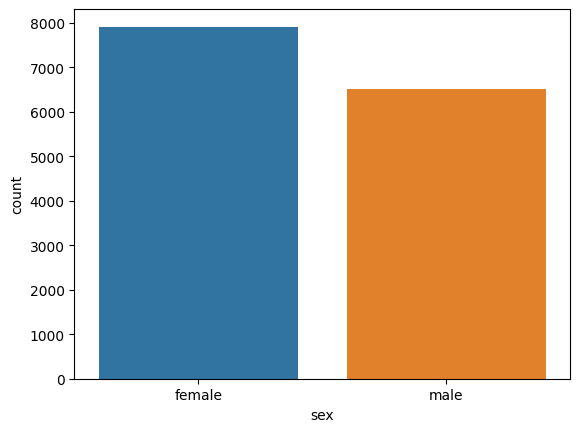

In [18]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x='sex')

In [20]:
# 변수 검토하기
welfare['income'].dtypes # 변수 타입 확인

dtype('float64')

In [21]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

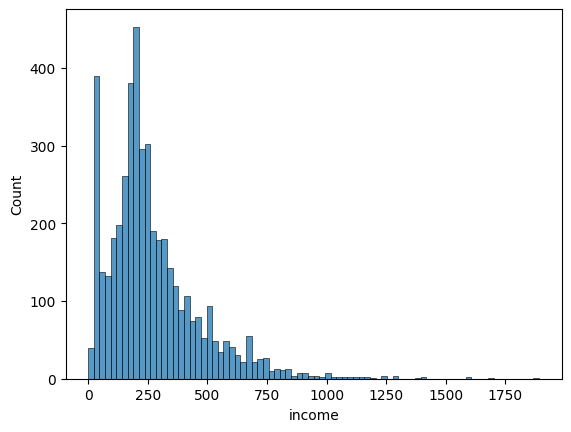

In [22]:
sns.histplot(data = welfare, x='income')

In [23]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [26]:
welfare['income'].isna().sum()

9884

In [32]:
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")

income 변수의 missing value: 68.55%


In [37]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
print(welfare['income'].isna().sum())
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")
# 이상치는 없다는 것을 확인

9884
income 변수의 missing value: 68.55%


In [39]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

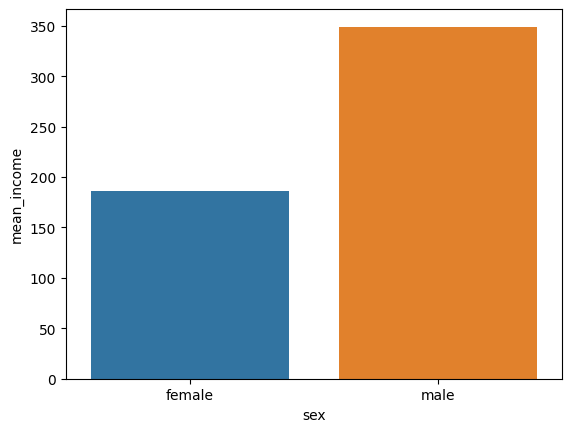

In [45]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

## 3. 나이와 월급의 관계
- Q. 몇 살 때 월급을 가장 많이 받을까?

In [46]:
welfare['birth'].dtypes

dtype('float64')

In [47]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

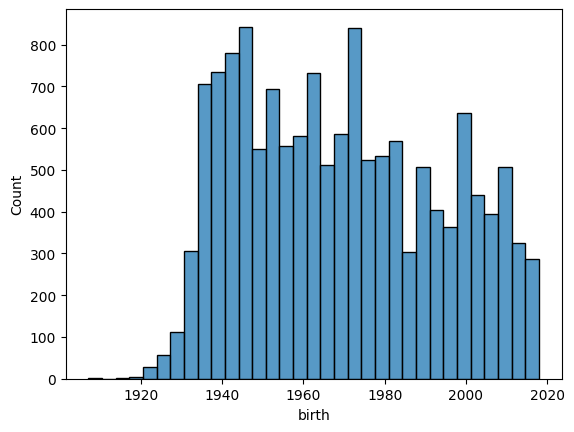

In [48]:
sns.histplot(data = welfare, x='birth')

In [49]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [50]:
welfare['birth'].isna().sum()

0

In [51]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

In [52]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

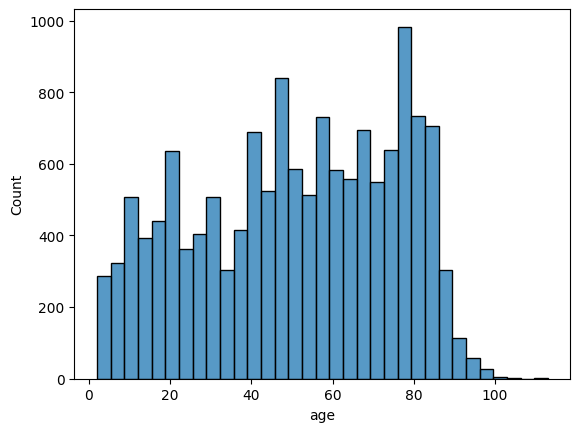

In [53]:
sns.histplot(data=welfare, x='age')

In [63]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

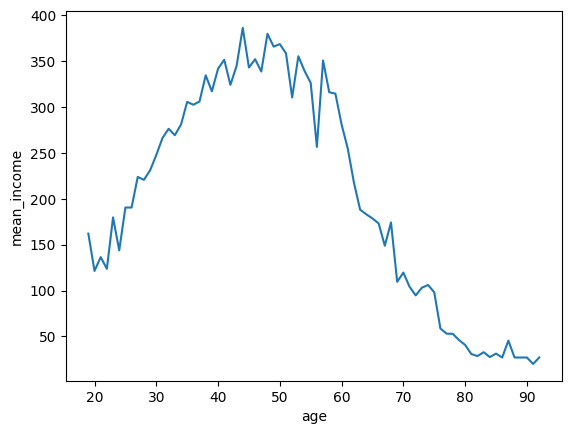

In [58]:
sns.lineplot(data=age_income, x='age', y='mean_income')

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_27881/19458693.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=welfare, x='age', y='income', ci=None)


<Axes: xlabel='age', ylabel='income'>

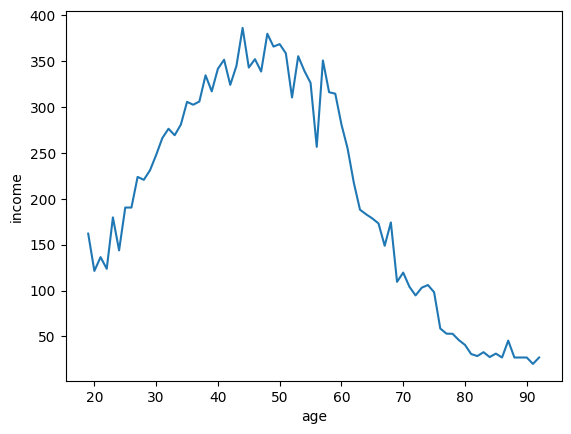

In [62]:
sns.lineplot(data=welfare, x='age', y='income', ci=None)

## 4. 연령대에 따른 월급 차이
- Q. 어떤 연령대의 월급이 가장 많을까?

In [64]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [65]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] < 60, 'middle', 'old')))

welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

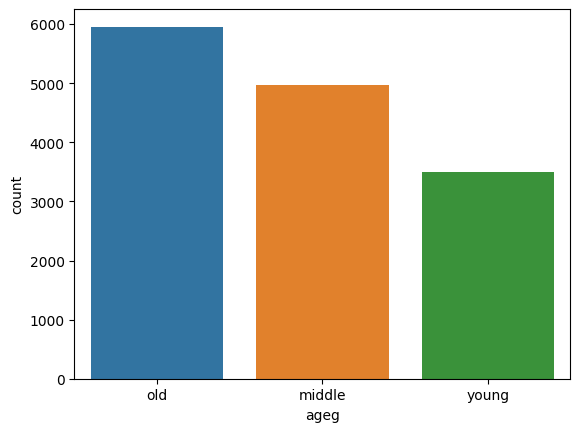

In [66]:
sns.countplot(data = welfare, x='ageg')

<Axes: xlabel='ageg', ylabel='count'>

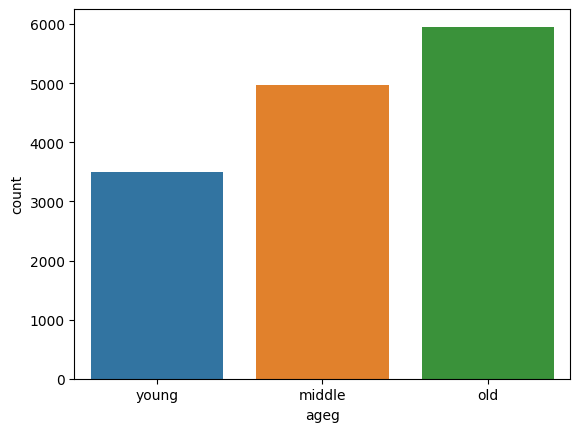

In [67]:
sns.countplot(data = welfare, x='ageg', order=['young', 'middle', 'old'])

In [70]:
ageg_income = welfare.dropna(subset=['income']) \
                     .groupby('ageg', as_index=False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

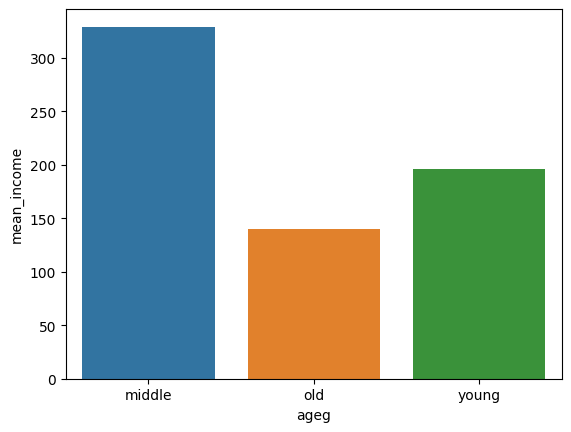

In [71]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

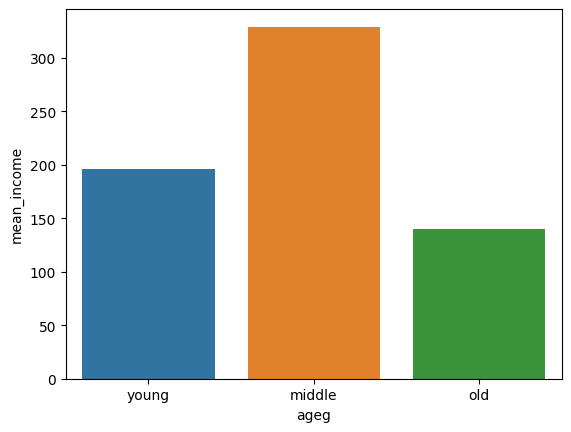

In [72]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

## 5. 연령대 및 성별 월급 차이
- 성별 월급 차이는 연령대별로 다를까?

In [77]:
sex_income = \
    welfare.dropna(subset = ['income']) \
           .groupby(['ageg', 'sex'], as_index=False) \
           .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

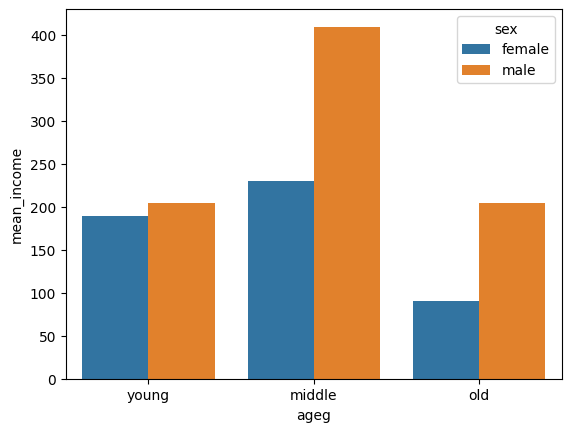

In [80]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [97]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

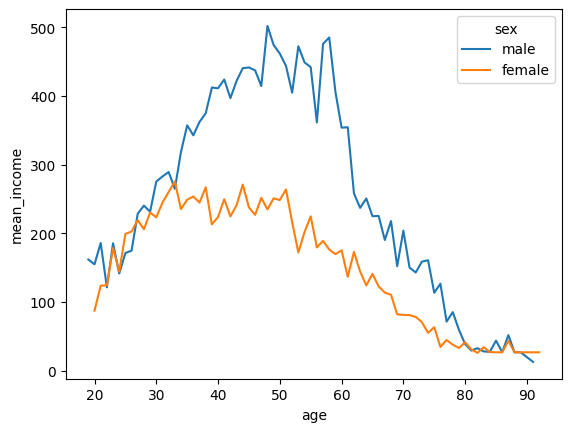

In [98]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [99]:
sex_age['mean_income'].max()

501.7936507936508

<Axes: xlabel='age', ylabel='Count'>

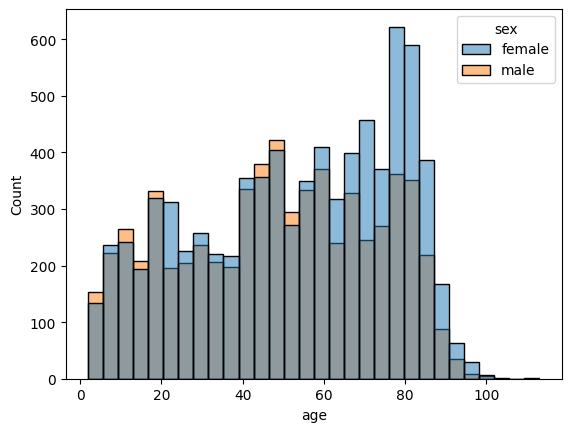

In [144]:
sns.histplot(data=welfare, x='age', hue='sex', bins=30)

In [136]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(max_income = ('income', 'max'),
                      min_income = ('income', 'min'))
sex_age = sex_age.assign(diff = sex_age['max_income'] - sex_age['min_income'])
print(sex_age['diff'].max())
sex_age.query("diff == 1742")

1742.0


,age,sex,max_income,min_income,diff
58,48.0,male,1892.0,150.0,1742.0
